# Set environment

In [1]:
### tools
library(tidyverse)
library(MPSK)

### plots
library(gridExtra)
library(RColorBrewer)

### directory
#datadir = "/data/flow/EP3/files"
datadir = "./"

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



# Import Data

In [2]:
fnames = dir(datadir) %>% grep("N1000.RDS", ., value = TRUE) %>% grep("mpsk", ., value = TRUE)
fnames = sort(fnames)
print(fnames)

 [1] "mpsk_ep3_01_F6901PRY_C_SEED0_N1000.RDS"
 [2] "mpsk_ep3_01_G6904VJT_E_SEED0_N1000.RDS"
 [3] "mpsk_ep3_01_K6902C85_A_SEED0_N1000.RDS"
 [4] "mpsk_ep3_02_F6901PRY_C_SEED0_N1000.RDS"
 [5] "mpsk_ep3_02_G6904VJT_E_SEED0_N1000.RDS"
 [6] "mpsk_ep3_03_F6901PRY_C_SEED0_N1000.RDS"
 [7] "mpsk_ep3_03_G6904VJT_E_SEED0_N1000.RDS"
 [8] "mpsk_ep3_03_K6902C85_A_SEED0_N1000.RDS"
 [9] "mpsk_ep3_05_F6901PRY_C_SEED0_N1000.RDS"
[10] "mpsk_ep3_05_G6904VJT_E_SEED0_N1000.RDS"
[11] "mpsk_ep3_05_K6902C85_A_SEED0_N1000.RDS"
[12] "mpsk_ep3_06_F6901PRY_C_SEED0_N1000.RDS"
[13] "mpsk_ep3_06_G6904VJT_E_SEED0_N1000.RDS"
[14] "mpsk_ep3_06_K6902C85_A_SEED0_N1000.RDS"
[15] "mpsk_ep3_07_F6901PRY_C_SEED0_N1000.RDS"
[16] "mpsk_ep3_07_G6904VJT_E_SEED0_N1000.RDS"
[17] "mpsk_ep3_07_K6902C85_A_SEED0_N1000.RDS"
[18] "mpsk_ep3_09_F6901PRY_C_SEED0_N1000.RDS"
[19] "mpsk_ep3_09_G6904VJT_E_SEED0_N1000.RDS"
[20] "mpsk_ep3_09_K6902C85_A_SEED0_N1000.RDS"
[21] "mpsk_ep3_10_F6901PRY_C_SEED0_N1000.RDS"
[22] "mpsk_ep3_10_G6904VJT_E_SEED0

In [3]:
res_batch = lapply(fnames, readRDS)
names(res_batch) = fnames

In [141]:
markers = c('FSC_A', 'SSC_A', 'CD3', 'CD4', 'CD8', 'IFN+IL2')

# Benchmark

In [4]:
tt = sapply(res_batch, function(res){
    tt_stop  = res$time_stop
    tt_start = res$time_start
    tt_diff  = difftime(tt_stop, tt_start, units = "mins")
    return(tt_diff)
}) # end lapply

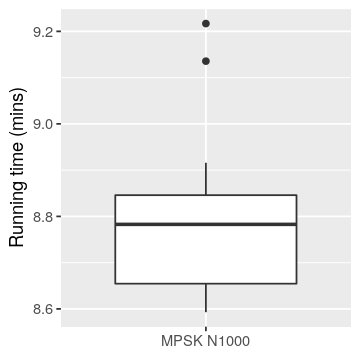

In [5]:
options(repr.plot.height = 3, repr.plot.width = 3)

gp = data.frame(y = tt, x = "MPSK N1000") %>%
    ggplot(., aes(x = x, y = y)) +   
    geom_boxplot() +
    labs(y = "Running time (mins)") + 
    theme(axis.title.x = element_blank())

print(gp)

# Relabel and Calibration

In [6]:
res_process = lapply(res_batch, function(lst){
    res           = lst$res
    resRelab      = relabelChain(res)
    resCalibrated = calibrate(resRelab)
    chainSummary  = summarizeChain(resRelab)
    
    return(list(
        resRelab      = resRelab,
        resCalibrated = resCalibrated,
        chainSummary  = chainSummary
    ))
}) # end lapply

# Visualization
**Here I first visualize using the sample code**

Choose a sample

In [9]:
print(length(res_process))
names(res_process)

[1] 26


[1] "mpsk_ep3_01_F6901PRY_C_SEED0_N1000.RDS"
 [2] "mpsk_ep3_01_G6904VJT_E_SEED0_N1000.RDS"
 [3] "mpsk_ep3_01_K6902C85_A_SEED0_N1000.RDS"
 [4] "mpsk_ep3_02_F6901PRY_C_SEED0_N1000.RDS"
 [5] "mpsk_ep3_02_G6904VJT_E_SEED0_N1000.RDS"
 [6] "mpsk_ep3_03_F6901PRY_C_SEED0_N1000.RDS"
 [7] "mpsk_ep3_03_G6904VJT_E_SEED0_N1000.RDS"
 [8] "mpsk_ep3_03_K6902C85_A_SEED0_N1000.RDS"
 [9] "mpsk_ep3_05_F6901PRY_C_SEED0_N1000.RDS"
[10] "mpsk_ep3_05_G6904VJT_E_SEED0_N1000.RDS"
[11] "mpsk_ep3_05_K6902C85_A_SEED0_N1000.RDS"
[12] "mpsk_ep3_06_F6901PRY_C_SEED0_N1000.RDS"
[13] "mpsk_ep3_06_G6904VJT_E_SEED0_N1000.RDS"
[14] "mpsk_ep3_06_K6902C85_A_SEED0_N1000.RDS"
[15] "mpsk_ep3_07_F6901PRY_C_SEED0_N1000.RDS"
[16] "mpsk_ep3_07_G6904VJT_E_SEED0_N1000.RDS"
[17] "mpsk_ep3_07_K6902C85_A_SEED0_N1000.RDS"
[18] "mpsk_ep3_09_F6901PRY_C_SEED0_N1000.RDS"
[19] "mpsk_ep3_09_G6904VJT_E_SEED0_N1000.RDS"
[20] "mpsk_ep3_09_K6902C85_A_SEED0_N1000.RDS"
[21] "mpsk_ep3_10_F6901PRY_C_SEED0_N1000.RDS"
[22] "mpsk_ep3_10_G6904VJT_E_SEED0_N1000.RDS"
[23] "mpsk_ep3_10_K6902C85_A_SEED0_N1000.RDS"
[24] "mpsk_ep3_11_F6901PRY_C_SEED0_N1000.RDS"
[25] "mpsk_ep3_11_G6904VJT_E_SEED0_N1000.RDS"
[26] "mpsk_ep3_11_K6902C85_A_SEED0_N1000.RDS"

In [140]:
idx           <- 1
resMPSK       <- res_process[[idx]]
res           <- resMPSK$resRelab
resCalibrated <- resMPSK$resCalibrated
chainSummary  <- resMPSK$chainSummary

Y = res$data$Y
C = res$data$C
J = length(unique(C))            # number of samples
kIdx = unique(chainSummary$t)    # unempty clusters
#par(mfrow = c(3, J))             # 
#par(mar=c(2.5, 2.5, 1.5, 0))     # set margin

cat("",
    "#Total Clusters:    ", J, "\n",
    "#Non empty clusters:", length(chainSummary$t), "\n",
    "Non empty clusters: ", kIdx)

 #Total Clusters:     12 
 #Non empty clusters: 12000 
 Non empty clusters:  1 3 6 7 9 2 4 10 8 5

set plot style

In [14]:
my_set_style <- function(){
    plot(0, 0, type = "n", ann = FALSE, axes = FALSE)          # empty plot
    u <- par("usr")                                            # The coordinates of the plot area
    rect(u[1], u[3], u[2], u[4], col = "#EAEAF2", border = NA) # set plot background (seaborn: #EAEAF2)
    #rect(u[1], u[3], u[2], u[4], col = "#dcdcf2", border = NA) 
    grid(lty = 1, lwd = 2, col = "white")                      # grid line
    par(new=TRUE)
}

plot data original  
Note: [how to acquire more categorical color from RColorBrewer](https://stackoverflow.com/questions/15282580/how-to-generate-a-number-of-most-distinctive-colors-in-r)

[1] -2.150797  3.119138
[1] -1.224973  4.511858


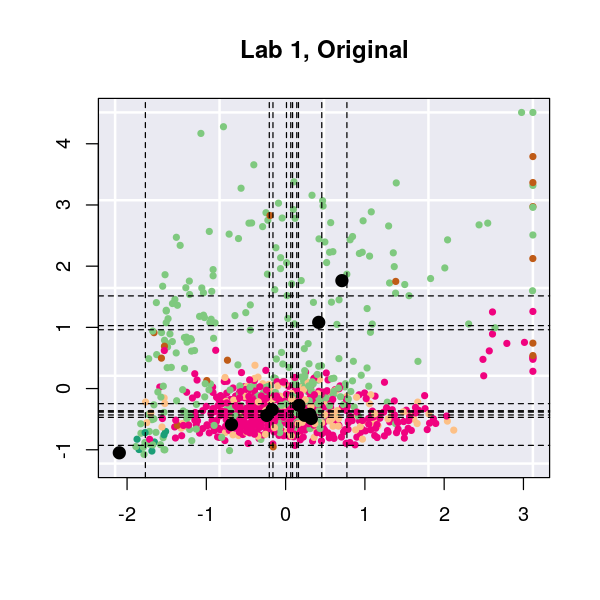

In [38]:
options(repr.plot.height = 5, repr.plot.width = 5)

# Plot and color the original data:
for (j in 1) { # for each sample
    
    ### set style
    my_set_style()
    
    # range of x and y coordinate
    xrng = range(Y[,1])
    yrng = range(Y[,2])
    #print(range(res$data$Y[C == j, 1]))
    print(xrng); print(yrng)
    # plot each cluster
    
    plot(
        ### coordinate
        res$data$Y[C == j, 1], res$data$Y[C == j, 2], 
        
        ### markers
        pch = 20, cex = 1, #pch="'", cex = 3,
        col = col_vector[chainSummary$t[C == j]],
        #col = brewer.pal(res$prior$K, "Dark2")[chainSummary$t[C == j]],
        #col=rainbow(res$prior$K)[chainSummary$t[C==j]],
        
        
        ### labels
        main = paste0("Lab ", j, ", Original"),
        xlab = "",   ylab = "", 
        xlim = xrng, ylim = yrng)
    
    ### meanvec
    abline(h = chainSummary$meanvec0[2, kIdx], lty = 2)
    abline(v = chainSummary$meanvec0[1, kIdx], lty = 2)
    
    ### centers
    points(chainSummary$xi[j, 1, kIdx], chainSummary$xi[j, 2, kIdx], pch = 20, cex = 2)
}

Plot the results after calibration

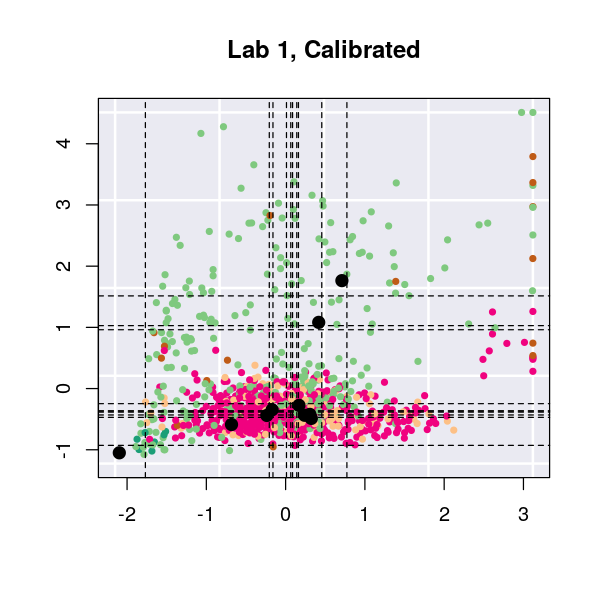

In [36]:
# Plot and color the calibrated data:
for (j in 1) {
    
    ### set style
    my_set_style()
    
    ### plot data
    plot(
        ### coordinate
        resCalibrated$Y_cal[C == j, 1], resCalibrated$Y_cal[C == j, 2], 
        
        ### marker
        pch = 20, cex = 1, #pch="'", 
        col = col_vector[chainSummary$t[C == j]],
        #col = brewer.pal(res$prior$K, "Dark2")[chainSummary$t[C == j]],
        #col=rainbow(res$prior$K)[chainSummary$t[C==j]],
       
        ### label
        main = paste0("Lab ",j,", Calibrated"),
        xlab="", ylab="", xlim=xrng, ylim=yrng)
    
    ### mean of each cluster across the samples / labs
    abline(h=chainSummary$meanvec0[2, kIdx], lty = 2) # horizontal: set y
    abline(v=chainSummary$meanvec0[1, kIdx], lty = 2) # horizontal: set x
    
    ### centers
    points(chainSummary$xi[j, 1, kIdx], chainSummary$xi[j, 2, kIdx], pch = 20, cex = 2)
}

# plot the above using ggplot
**Convert the above to ggplot so that I could show all different treatment-patient combination**

In [143]:
idx           <- 1
resMPSK       <- res_process[[idx]]
res           <- resMPSK$resRelab
resCalibrated <- resMPSK$resCalibrated
chainSummary  <- resMPSK$chainSummary

Y = res$data$Y
C = res$data$C
J = length(unique(C))            # number of samples
kIdx = unique(chainSummary$t)    # unempty clusters

cat("",
    "#Total Clusters:    ", J, "\n",
    "#Non empty clusters:", length(chainSummary$t), "\n",
    "Non empty clusters: ", kIdx)

 #Total Clusters:     12 
 #Non empty clusters: 12000 
 Non empty clusters:  1 3 6 7 9 2 4 10 8 5

arrange original data

In [131]:
Y = res$data$Y
C = res$data$C

tmp = as.data.frame(Y)
tmp$J = paste("Lab", C)
tmp$t = as.character(chainSummary$t)


dat_ori = tmp
head(dat_ori)

FSC_A       SSC_A      CD3        CD4        CD8        IFN+IL2    J     t
1 -1.52353343 -1.0000067 -0.6005307 -0.8661512  0.6412758 -0.7151905 Lab 1 1
2  0.06527002 -0.1659092  0.9271495 -0.9340987  1.1521844  0.1762294 Lab 1 3
3 -0.24526005 -0.4355362  1.4204080  1.4086195  0.6108830 -3.6182581 Lab 1 6
4  1.66944683  0.4448103 -0.7646025 -0.2120562  0.8183402 -0.2806164 Lab 1 1
5 -0.05181140  0.5907199 -0.6204107 -0.6485822 -0.2744436  0.1747416 Lab 1 1
6  0.81362796  2.4311097 -0.4659366  0.2243218  1.6796337  0.6124441 Lab 1 1

arrange calibrated data

In [132]:
Y_cal = resCalibrated$Y_cal
C = res$data$C

tmp = as.data.frame(Y_cal)
tmp$J = paste("Lab", C)
tmp$t = as.character(chainSummary$t)


dat_cal = tmp
head(dat_cal)

FSC_A       SSC_A      CD3        CD4        CD8        IFN+IL2    J     t
1 -1.52353343 -1.0000067 -0.6005307 -0.8661512  0.6412758 -0.7151905 Lab 1 1
2  0.06527002 -0.1659092  0.9271495 -0.9340987  1.1521844  0.1762294 Lab 1 3
3 -0.24526005 -0.4355362  1.4204080  1.4086195  0.6108830 -3.6182581 Lab 1 6
4  1.66944683  0.4448103 -0.7646025 -0.2120562  0.8183402 -0.2806164 Lab 1 1
5 -0.05181140  0.5907199 -0.6204107 -0.6485822 -0.2744436  0.1747416 Lab 1 1
6  0.81362796  2.4311097 -0.4659366  0.2243218  1.6796337  0.6124441 Lab 1 1

arrange chain Summary xi

In [144]:
tmp = chainSummary$xi
tmp = lapply(1:J, function(j){as.data.frame(tmp[j, , ])})

tmp = lapply(tmp, function(dat){rownames(dat) = markers; return(dat)})
tmp = lapply(tmp, function(dat){return(as.data.frame(t(dat)))})
tmp = lapply(tmp, function(dat){return(dat[kIdx,])})
tmp = lapply(1:J, function(j){dat = tmp[[j]]; dat$J = paste("Lab", j); return(dat)})
tmp = lapply(tmp, function(dat){dat$kIdx = kIdx; return(dat)})
tmp = do.call(bind_rows, tmp)

centers = tmp
head(centers)

FSC_A      SSC_A      CD3        CD4        CD8          IFN+IL2     J    
1 -0.2364888 -0.4389244 -1.0595748 -0.6254699  0.005891035 -0.02727158 Lab 1
2  0.2400758 -0.4361503  0.5271257 -1.5256829  1.421554357  0.01321460 Lab 1
3 -0.6824576 -0.5867890  1.1144891  1.1723032  0.307136796 -3.11602631 Lab 1
4  0.4175365  1.0819068  0.4931503  0.6773285 -0.687808203  0.60345888 Lab 1
5 -2.0979191 -1.0493202 -1.5702046 -1.5471988 -0.767039316 -0.66346224 Lab 1
6  0.1683532 -0.2737079 -1.4582590 -1.1887828 -0.313690918 -0.45332716 Lab 1
  kIdx
1 1   
2 3   
3 6   
4 7   
5 9   
6 2

arrange meanvec0

In [134]:
tmp = chainSummary$meanvec0
rownames(tmp) = markers
tmp = tmp[, kIdx]

meanvec0 = tmp
meanvec0

[,1]       [,2]         [,3]        [,4]      [,5]       [,6]       
FSC_A   -0.2059271  0.161754764  0.06501309 0.7730760 -1.7690060  0.14063384
SSC_A    1.0282590 -0.384598547 -0.36760701 0.9616540 -0.9278458 -0.24655594
CD3     -0.8044067  0.751464287  1.15172080 0.6428662 -1.4735129 -1.43075701
CD4     -0.2628839 -1.166520825  1.24276778 0.4069267 -1.4142949 -1.18734033
CD8      0.1832317  1.975657542  0.54614445 0.4152550 -0.6840432 -0.28823560
IFN+IL2  0.3889087  0.002169647 -3.21990889 0.5294273 -0.5061531 -0.06674958
        [,7]        [,8]        [,9]        [,10]      
FSC_A    0.08764469  0.45615379  0.01081901 -0.15970510
SSC_A   -0.43105342  1.51465056 -0.47049900 -0.36348652
CD3      0.80881116 -1.07683180  0.58020888  1.21585613
CD4      1.03318782 -0.28185118  0.56333868  1.51694757
CD8     -0.46117702 -0.09368816 -0.59683832 -0.19079032
IFN+IL2 -0.09058625  1.00297687  0.04014497  0.06577795

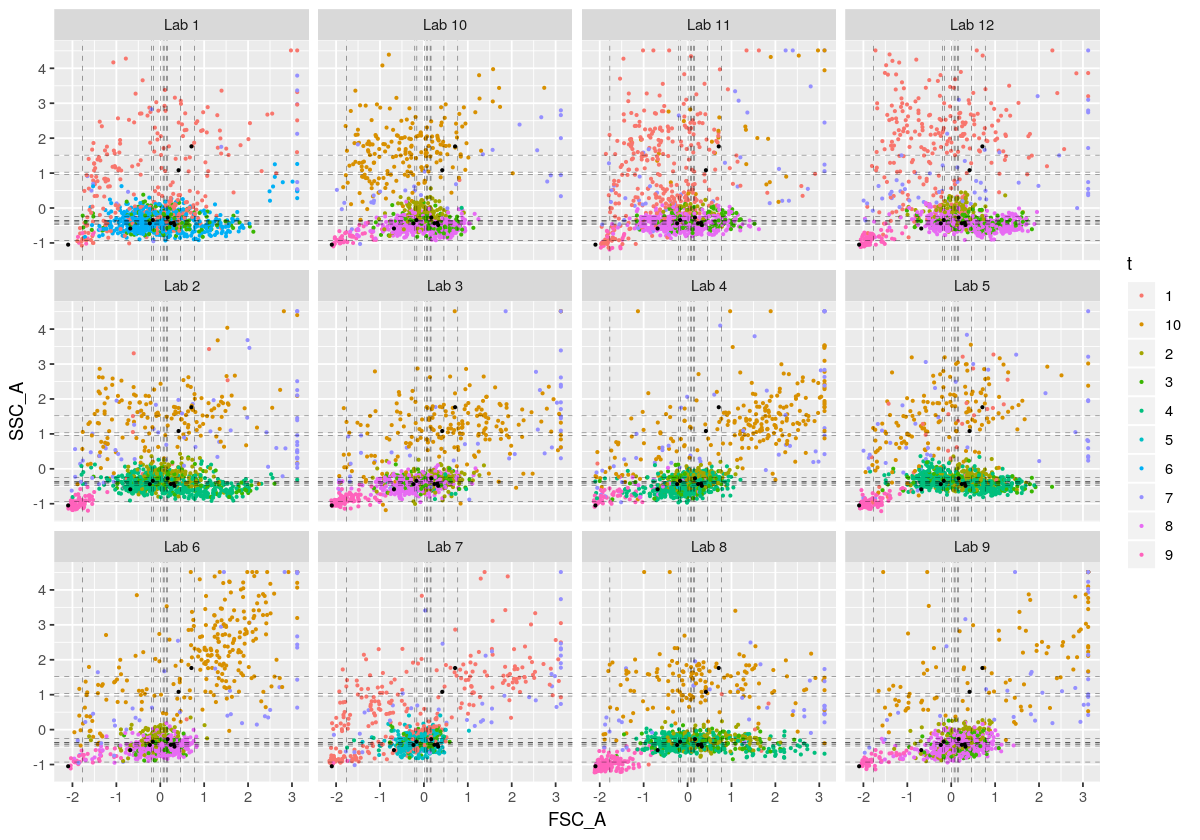

In [133]:
options(repr.plot.height = 7, repr.plot.width = 10)

gp = ggplot() + 
    geom_point(data = dat_ori, aes(x = FSC_A, y = SSC_A, color = t), size = 0.5) + 
    geom_point(data = centers, aes(x = FSC_A, y = SSC_A), size = 0.5) +
    geom_hline(yintercept = meanvec0["SSC_A", ], lty = 2, size = 0.1) +   
    geom_vline(xintercept = meanvec0["FSC_A", ], lty = 2, size = 0.1) +
    facet_wrap(~J) 

print(gp)

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 10)

gp = ggplot() + 
    geom_point(data = dat_cal, aes(x = FSC_A, y = SSC_A, color = t), size = 0.5) + 
    geom_point(data = centers, aes(x = FSC_A, y = SSC_A), size = 0.5) +
    geom_hline(yintercept = meanvec0["SSC_A", ], lty = 2, size = 0.1) +   
    geom_vline(xintercept = meanvec0["FSC_A", ], lty = 2, size = 0.1) +
    facet_wrap(~J) 

print(gp)

# Visualization all the results

Note the range of data for idx = 7, 8 contain data around FSC ~ -15

Warning message:
“Removed 6284 rows containing missing values (geom_point).”Warning message:
“Removed 60 rows containing missing values (geom_point).”Warning message:
“Removed 72 rows containing missing values (geom_vline).”Warning message:
“Removed 6284 rows containing missing values (geom_point).”Warning message:
“Removed 60 rows containing missing values (geom_point).”Warning message:
“Removed 72 rows containing missing values (geom_vline).”Warning message:
“Removed 6479 rows containing missing values (geom_point).”Warning message:
“Removed 72 rows containing missing values (geom_point).”Warning message:
“Removed 84 rows containing missing values (geom_vline).”Warning message:
“Removed 6479 rows containing missing values (geom_point).”Warning message:
“Removed 72 rows containing missing values (geom_point).”Warning message:
“Removed 84 rows containing missing values (geom_vline).”

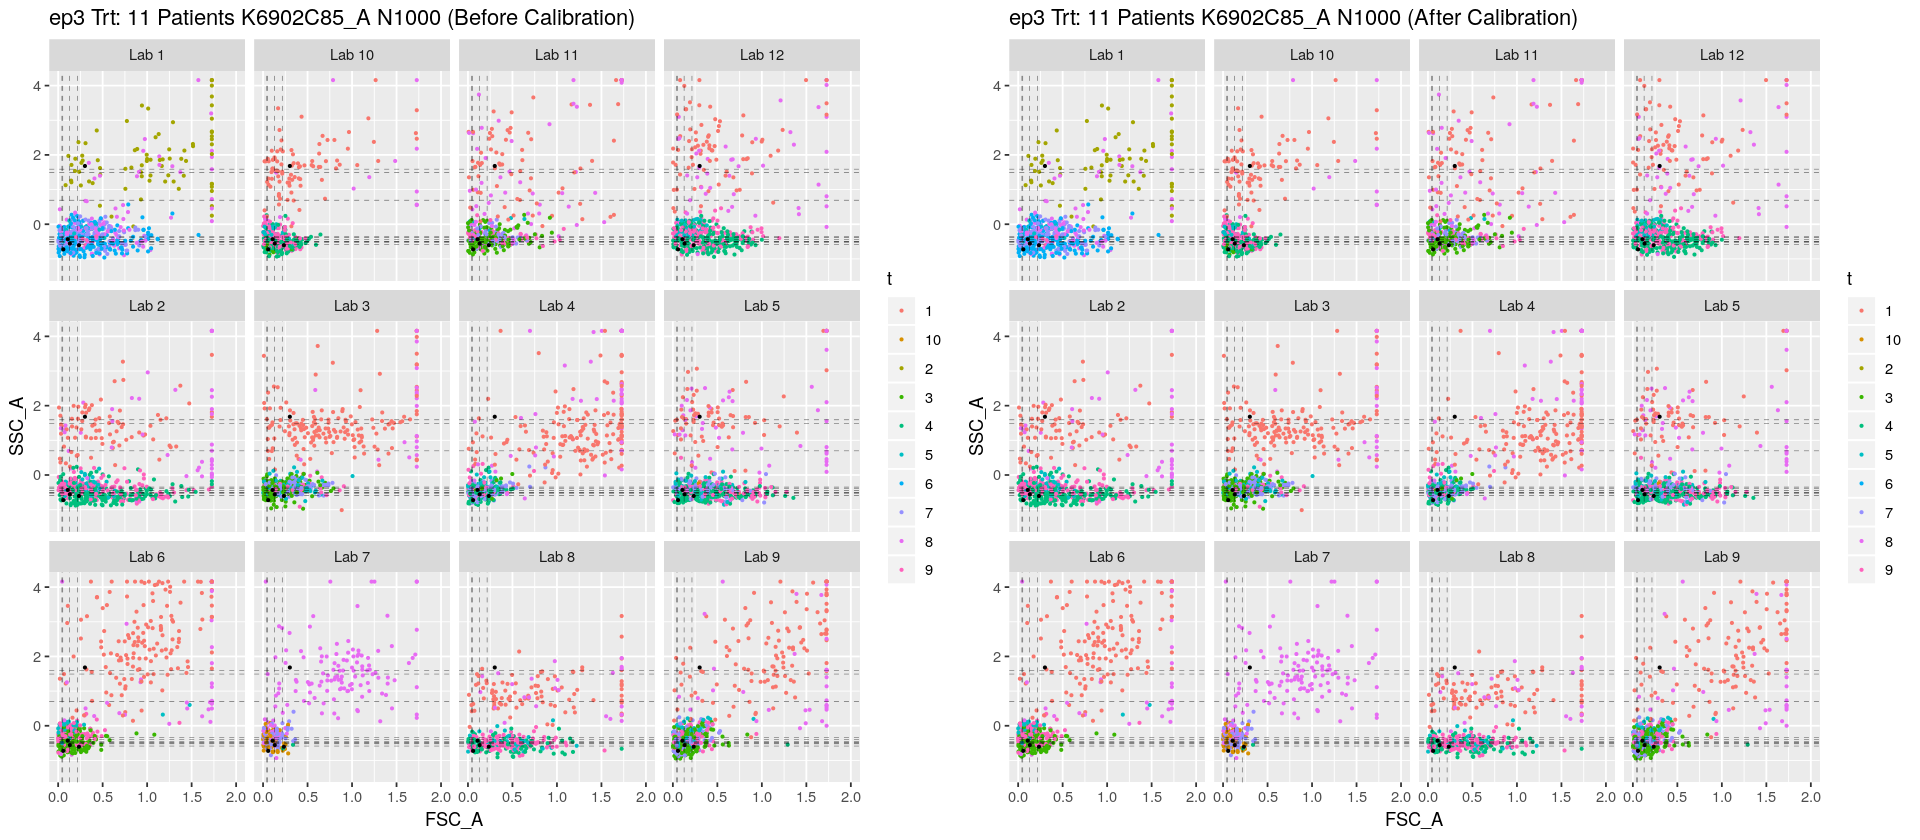

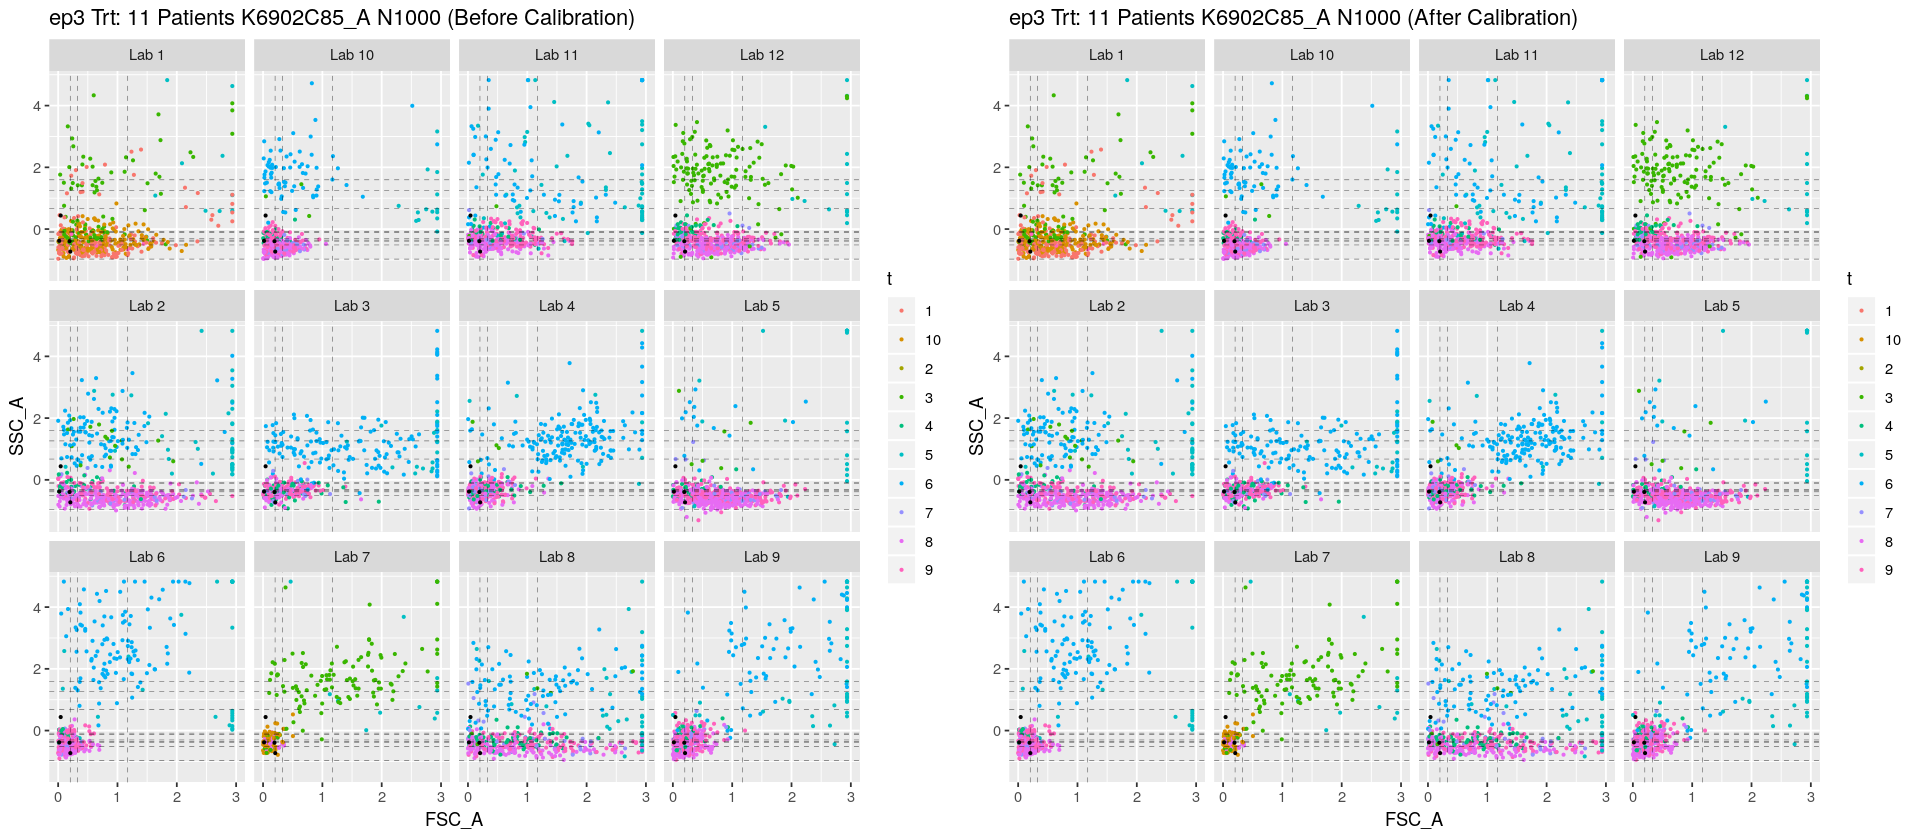

In [158]:
options(repr.plot.height = 7, repr.plot.width = 16)

for (idx in 1:length(res_process)){
#for (idx in 7:8){
    resMPSK       <- res_process[[idx]]
    res           <- resMPSK$resRelab
    resCalibrated <- resMPSK$resCalibrated
    chainSummary  <- resMPSK$chainSummary
    
    
    Y_cal = resCalibrated$Y_cal
    Y     = res$data$Y
    C     = res$data$C
    J     = length(unique(C))         # number of samples
    kIdx  = unique(chainSummary$t)    # unempty clusters
    
    
    ### original data
    tmp = as.data.frame(Y)
    tmp$J = paste("Lab", C)
    tmp$t = as.character(chainSummary$t)
    dat_ori = tmp
    
    ### calibrated data
    tmp = as.data.frame(Y_cal)
    tmp$J = paste("Lab", C)
    tmp$t = as.character(chainSummary$t)
    dat_cal = tmp
    
    ### centers
    tmp = chainSummary$xi
    tmp = lapply(1:J, function(j){as.data.frame(tmp[j, , ])})
    tmp = lapply(tmp, function(dat){rownames(dat) = markers; return(dat)})
    tmp = lapply(tmp, function(dat){return(as.data.frame(t(dat)))})
    tmp = lapply(tmp, function(dat){return(dat[kIdx,])})
    tmp = lapply(1:J, function(j){dat = tmp[[j]]; dat$J = paste("Lab", j); return(dat)})
    tmp = lapply(tmp, function(dat){dat$kIdx = kIdx; return(dat)})
    tmp = do.call(bind_rows, tmp)
    centers = tmp
    
    ### meanvec0
    tmp = chainSummary$meanvec0
    rownames(tmp) = markers
    tmp = tmp[, kIdx]
    meanvec0 = tmp
    
    ### plot the results
    # original data
    gp1 = ggplot() + 
        geom_point(data = dat_ori, aes(x = FSC_A, y = SSC_A, color = t), size = 0.5) + 
        geom_point(data = centers, aes(x = FSC_A, y = SSC_A), size = 0.5) +
        geom_hline(yintercept = meanvec0["SSC_A", ], lty = 2, size = 0.1) +   
        geom_vline(xintercept = meanvec0["FSC_A", ], lty = 2, size = 0.1) +
        facet_wrap(~J) 

    # calibrated data
    gp2 = ggplot() + 
        geom_point(data = dat_cal, aes(x = FSC_A, y = SSC_A, color = t), size = 0.5) + 
        geom_point(data = centers, aes(x = FSC_A, y = SSC_A), size = 0.5) +
        geom_hline(yintercept = meanvec0["SSC_A", ], lty = 2, size = 0.1) +   
        geom_vline(xintercept = meanvec0["FSC_A", ], lty = 2, size = 0.1) +
        facet_wrap(~J) 
    
    ### set title
    title = unlist(str_split(fname, "_|\\."))
    title = paste(title[2], "Trt:", title[3], "Patients", paste(title[4], title[5], sep = "_"), title[7])
    
    ### combine the plots
    grid.arrange(gp1 + labs(title = paste(title, "(Before Calibration)")) 
                     + xlim(0, round(max(dat_ori$FSC_A), 0)), 
                 gp2 + labs(title = paste(title, "(After Calibration)")) 
                     + xlim(0, round(max(dat_cal$FSC_A), 0)), 
                 ncol = 2)
} # end for loop

# hex plot

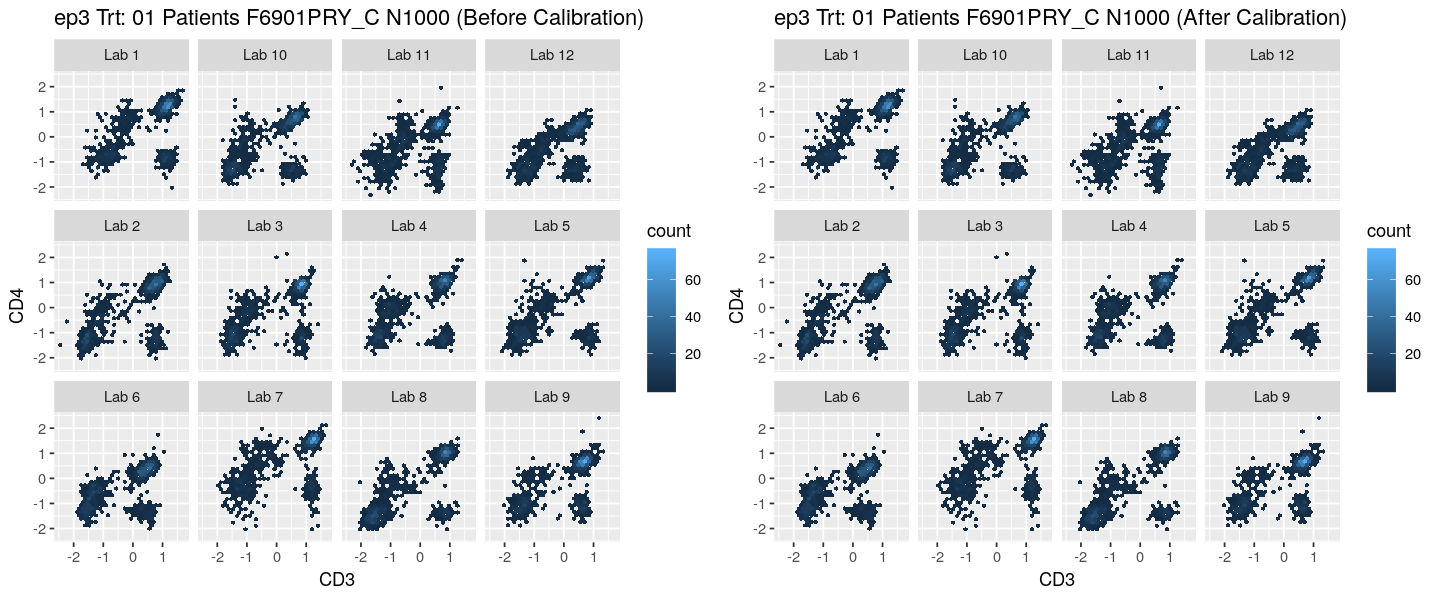

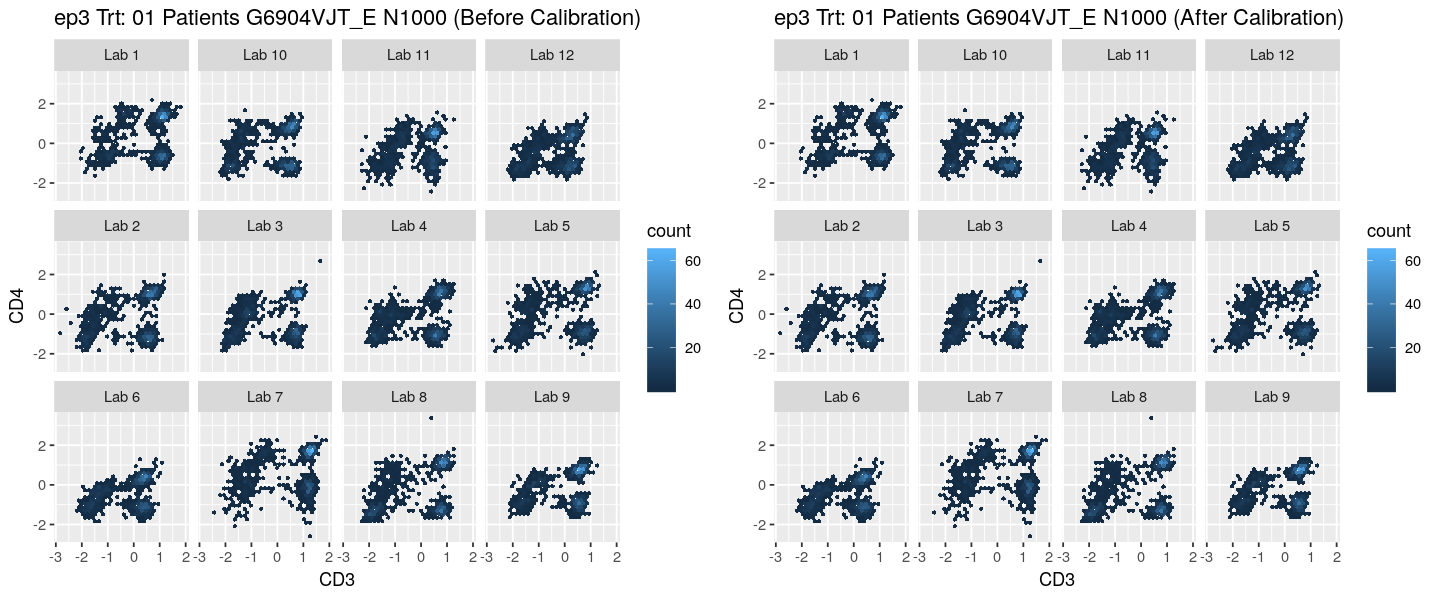

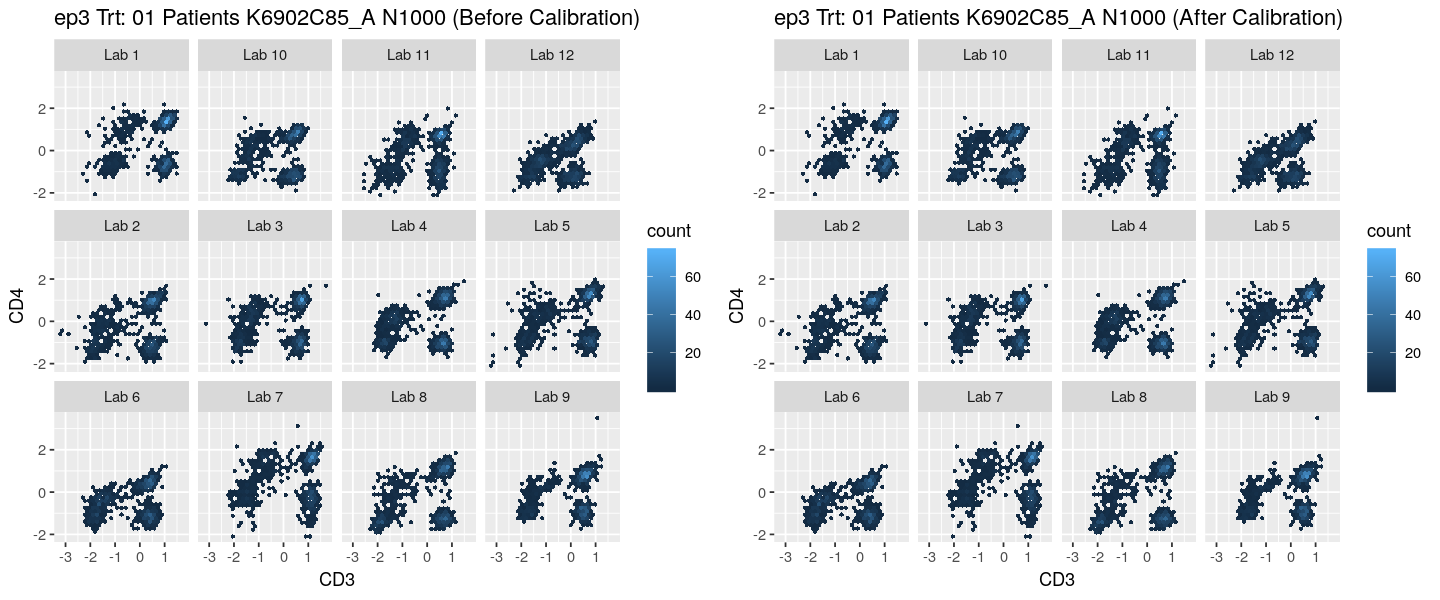

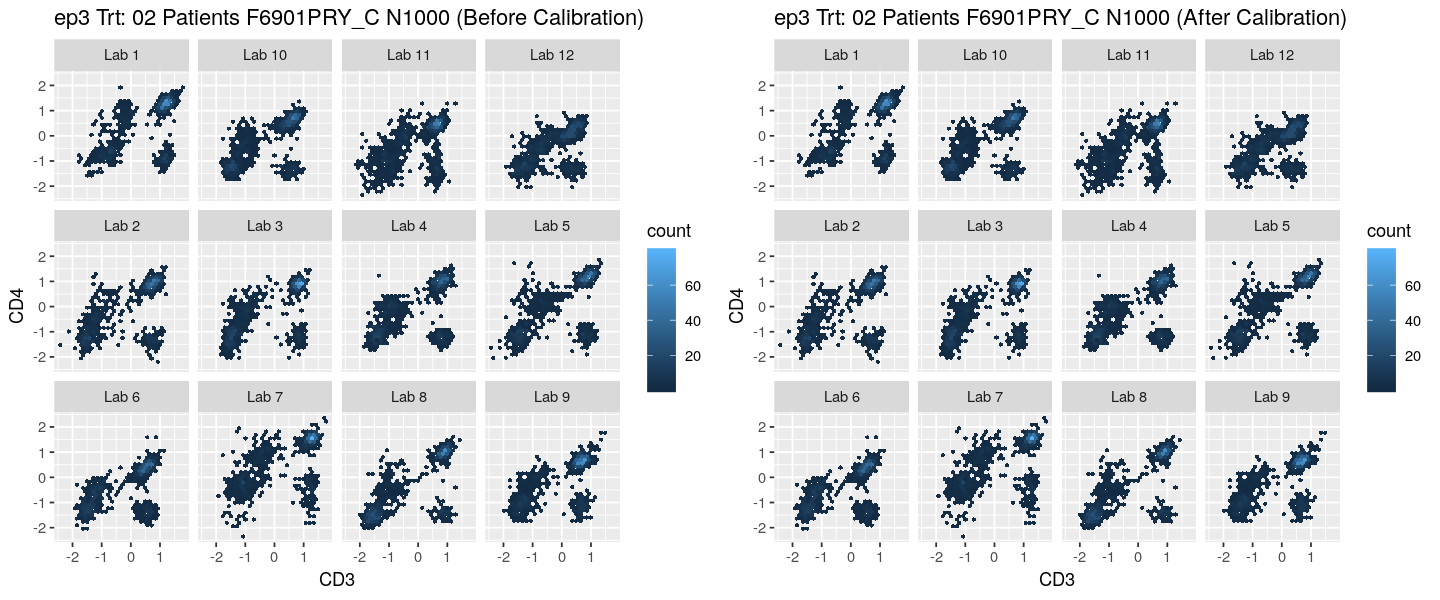

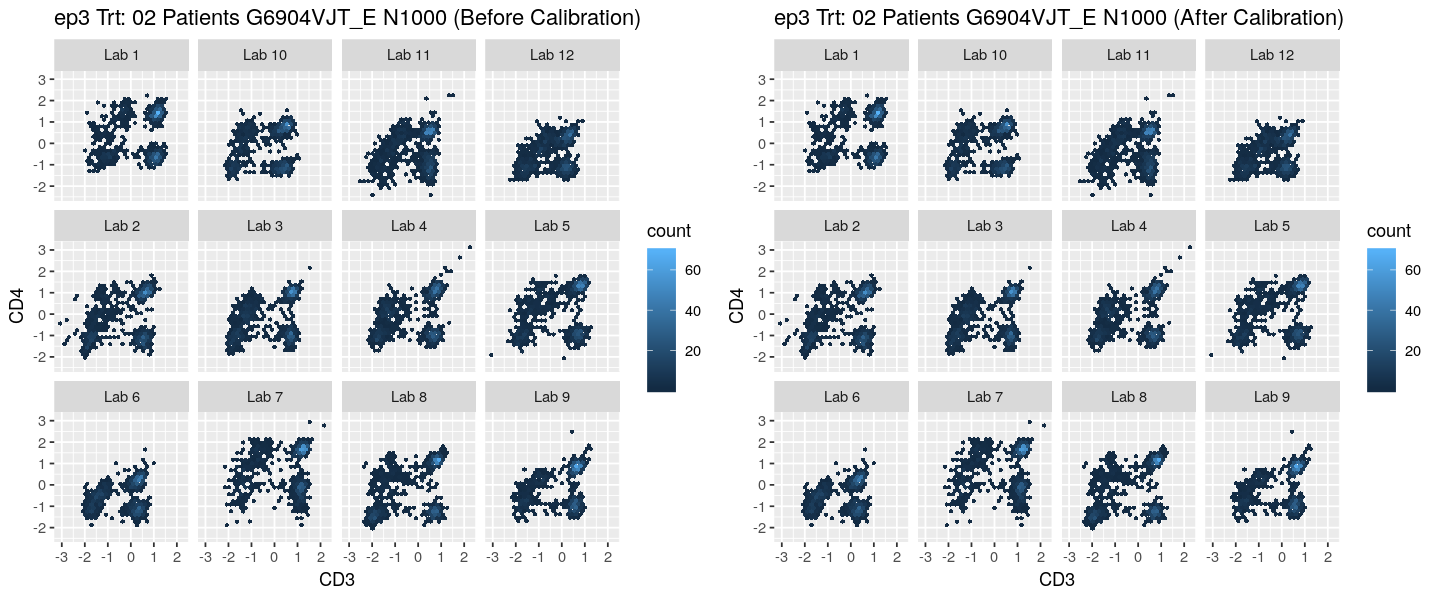

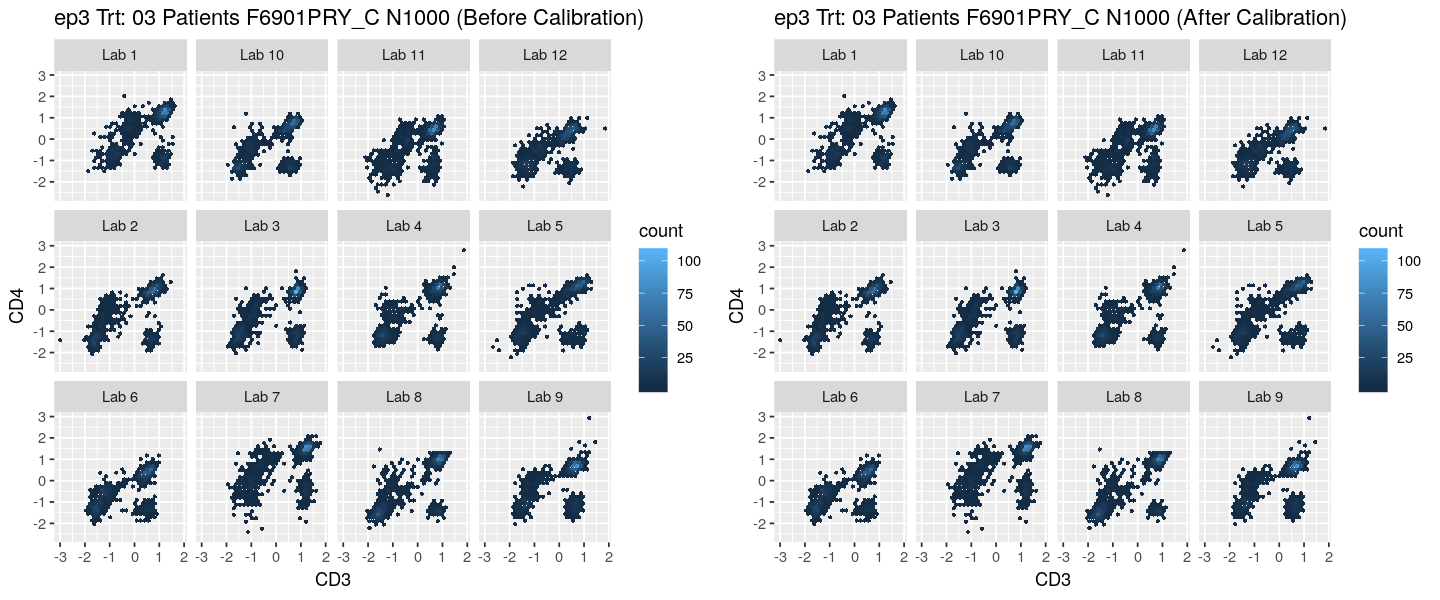

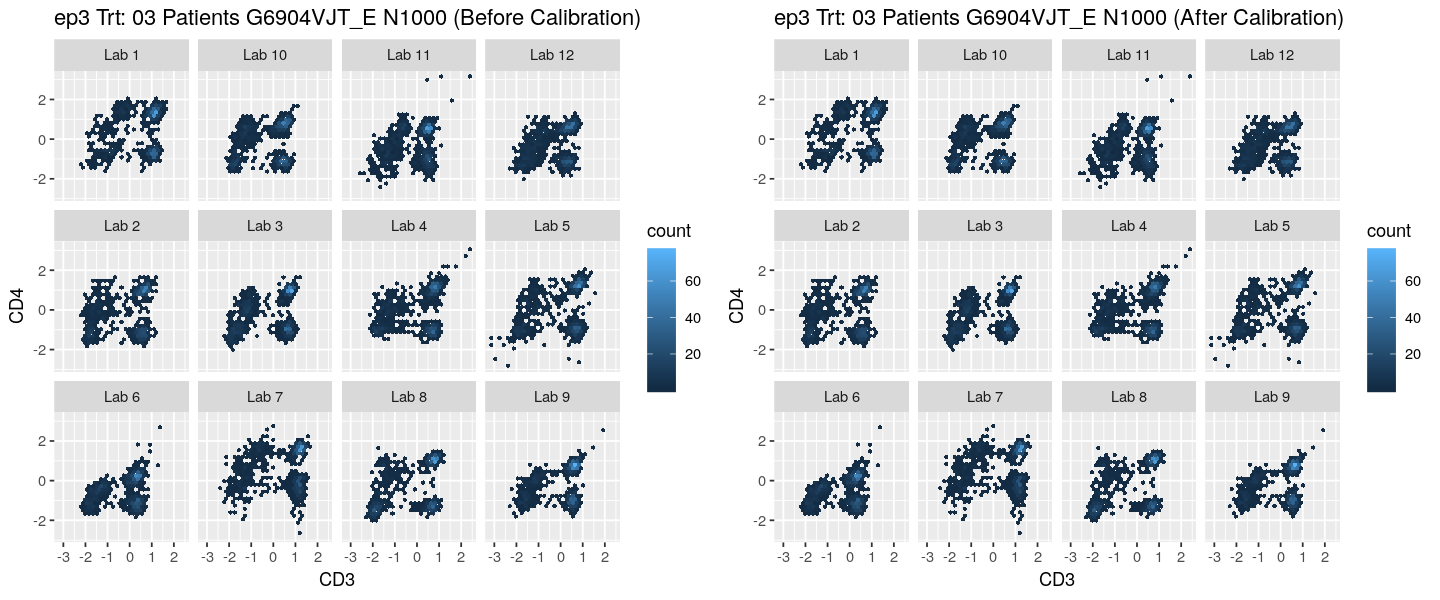

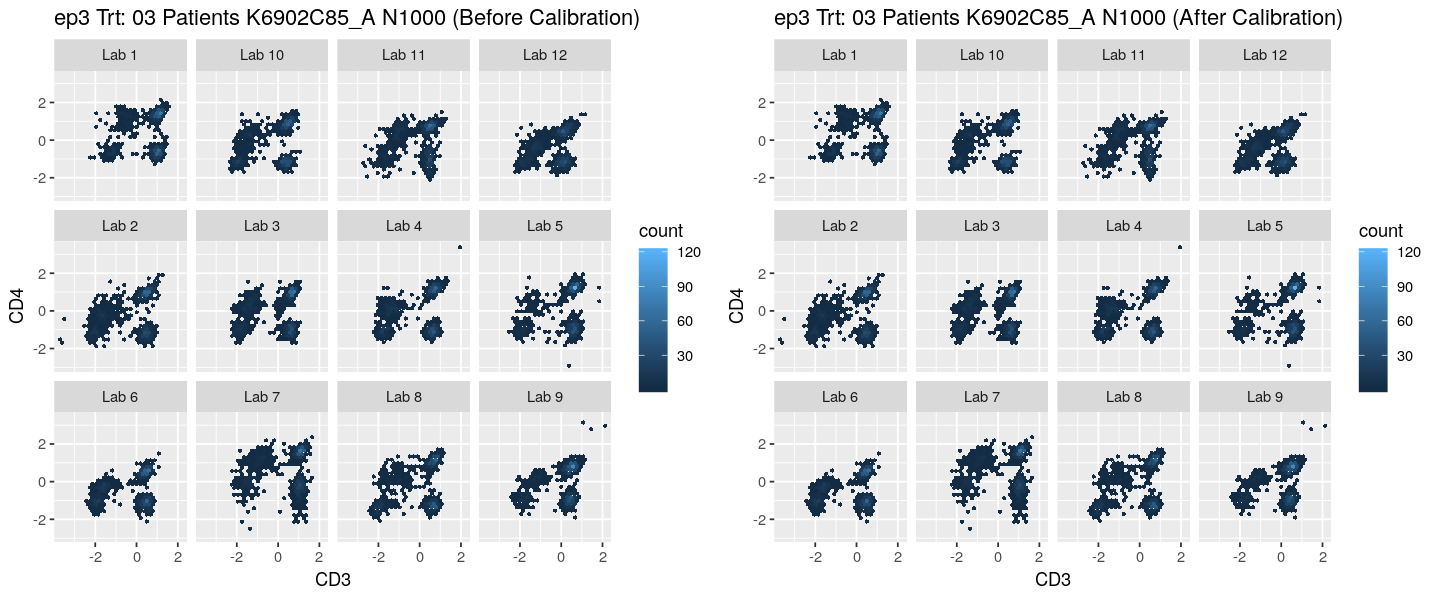

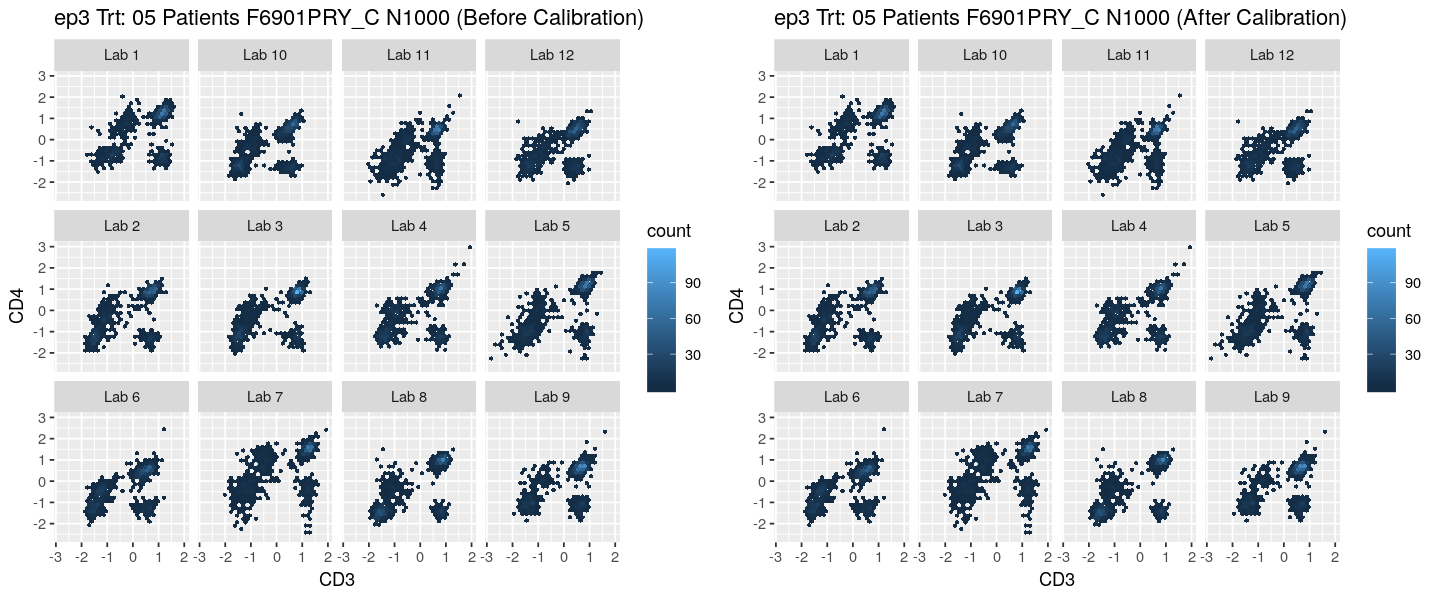

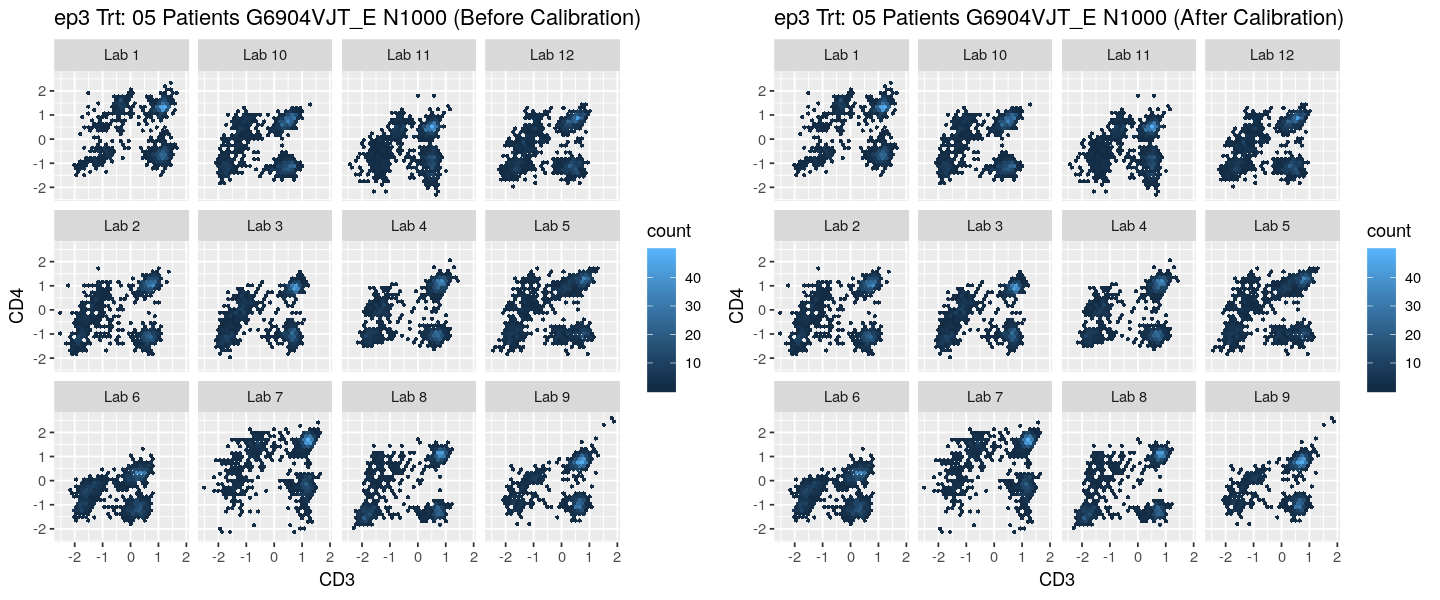

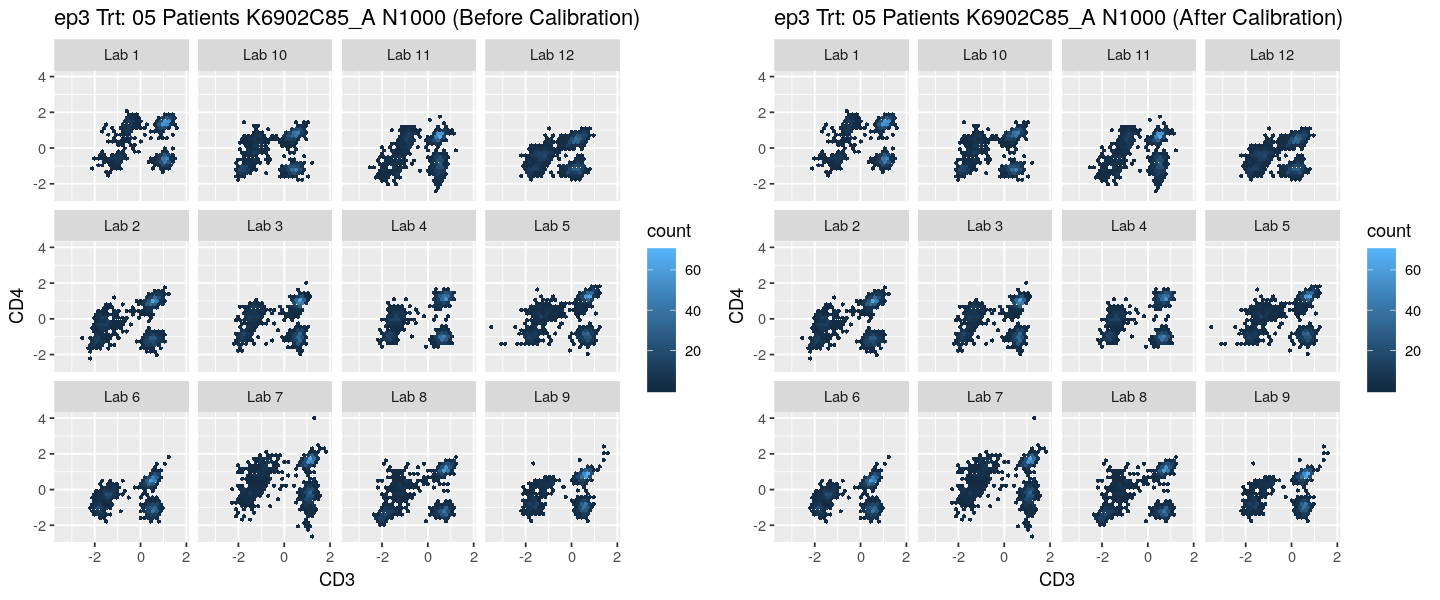

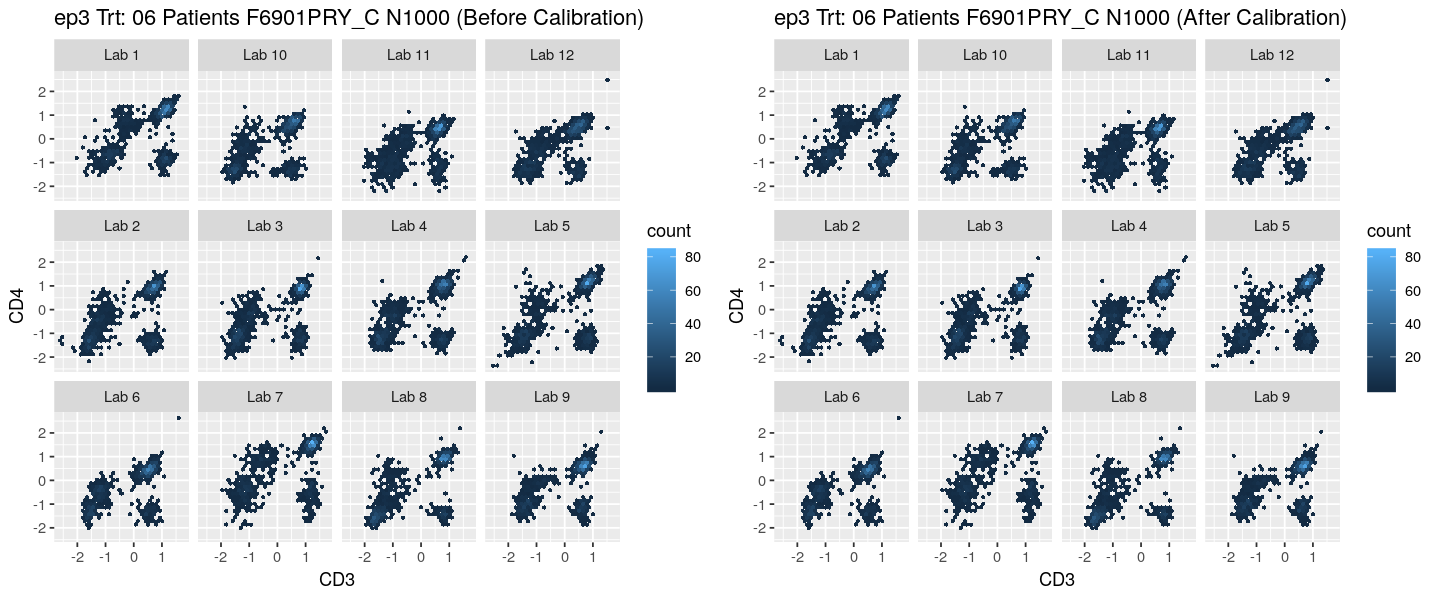

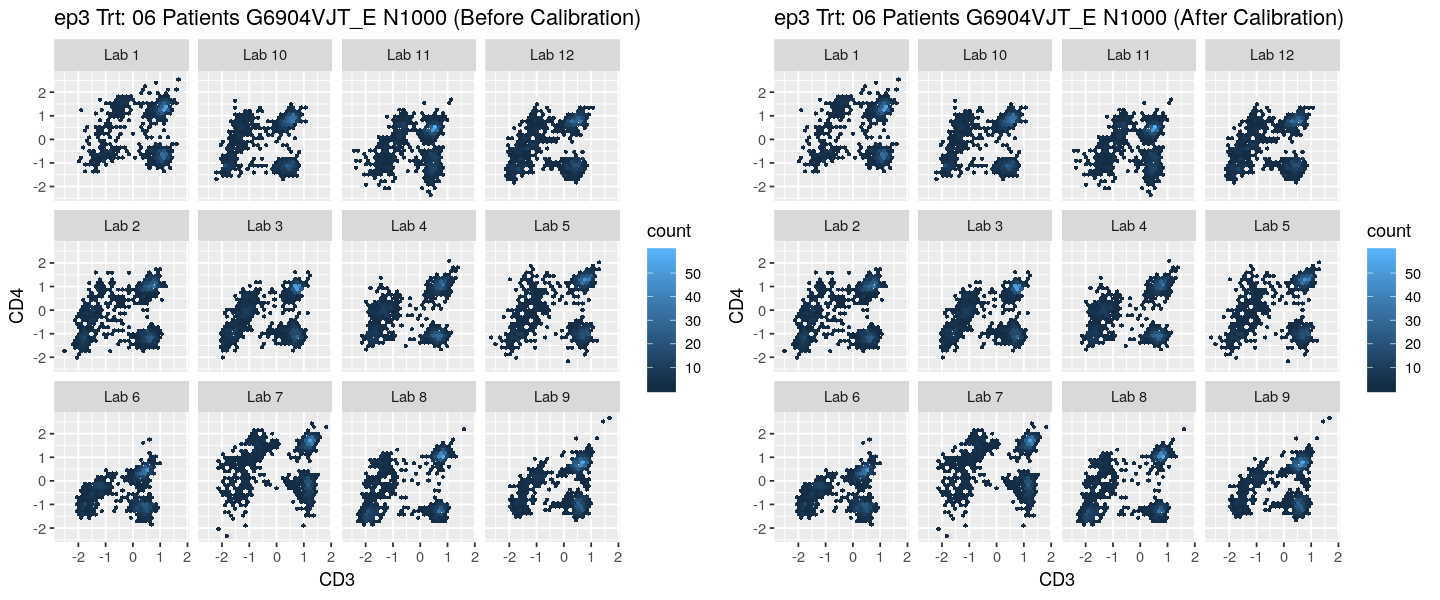

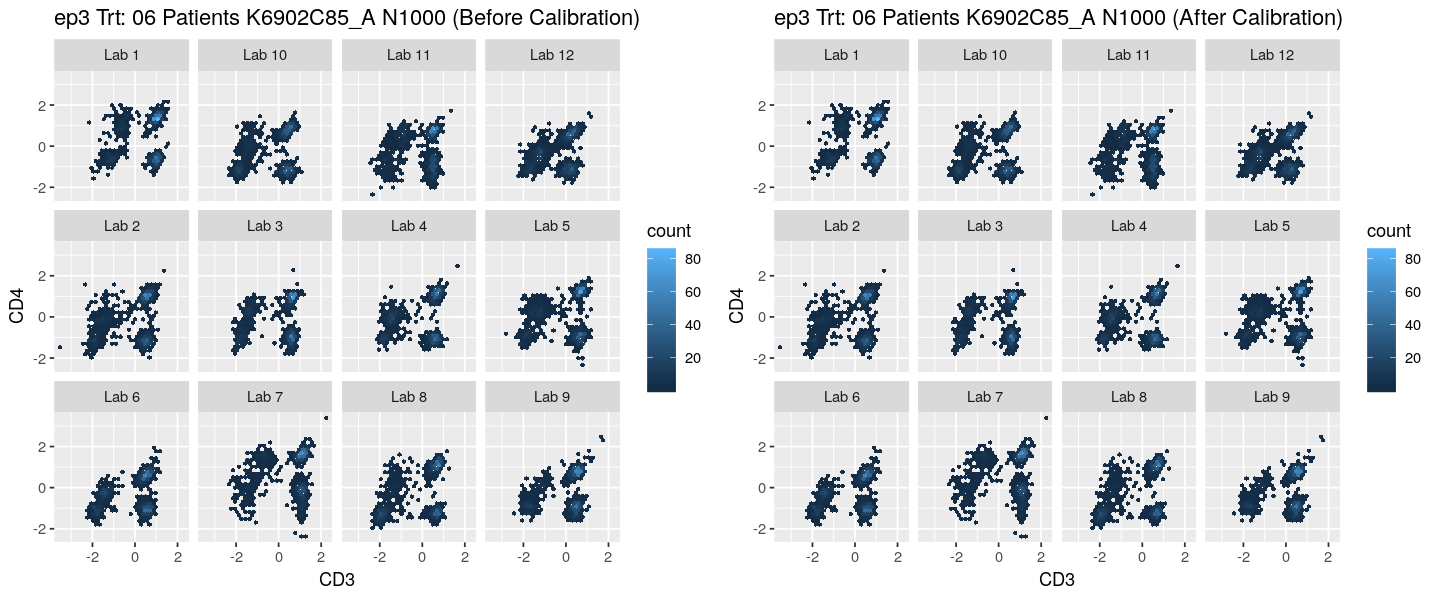

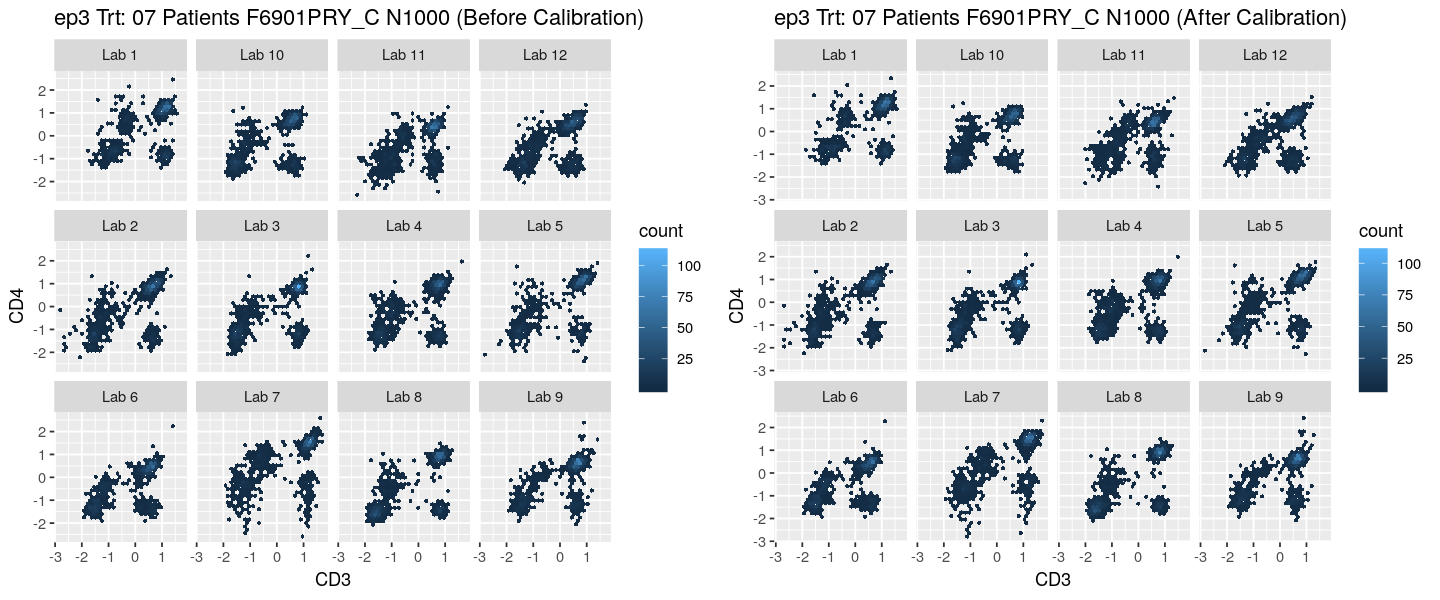

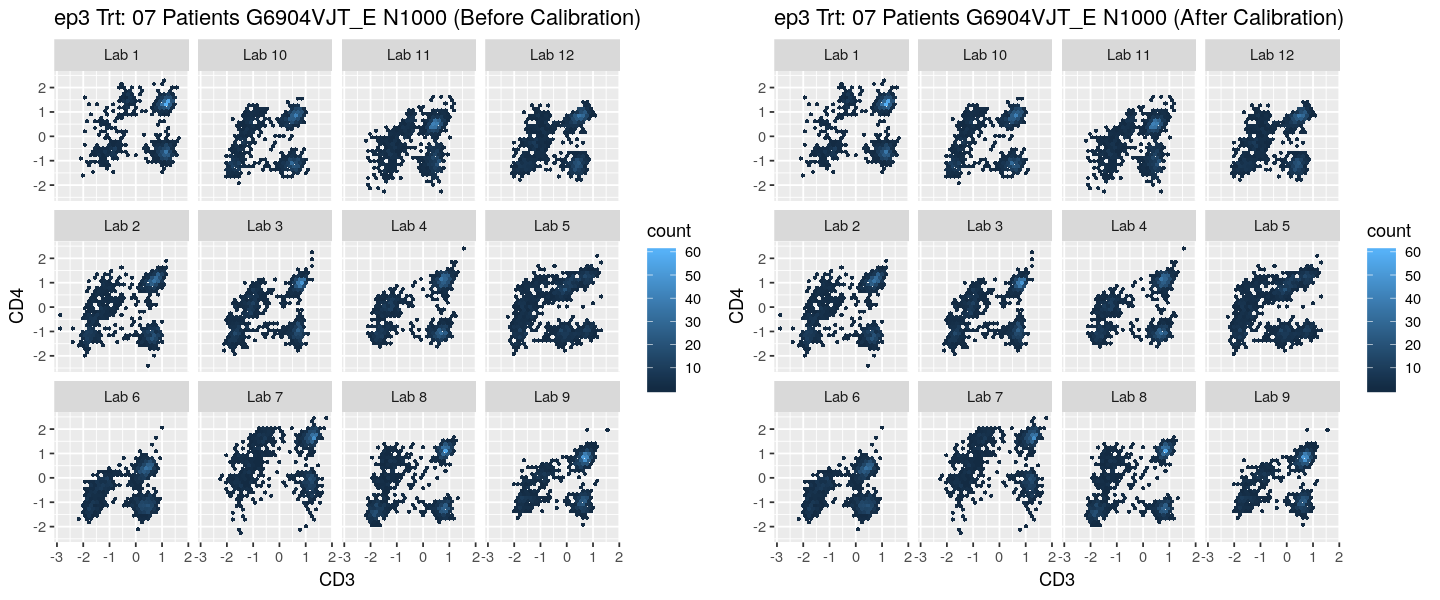

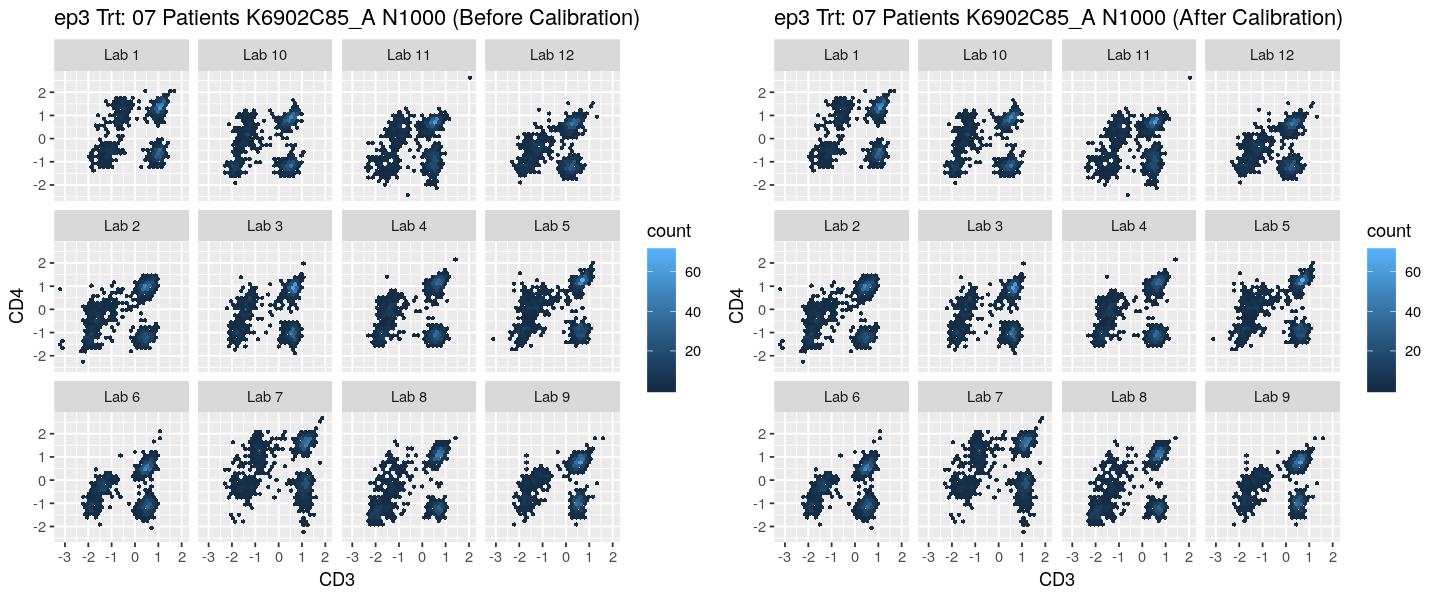

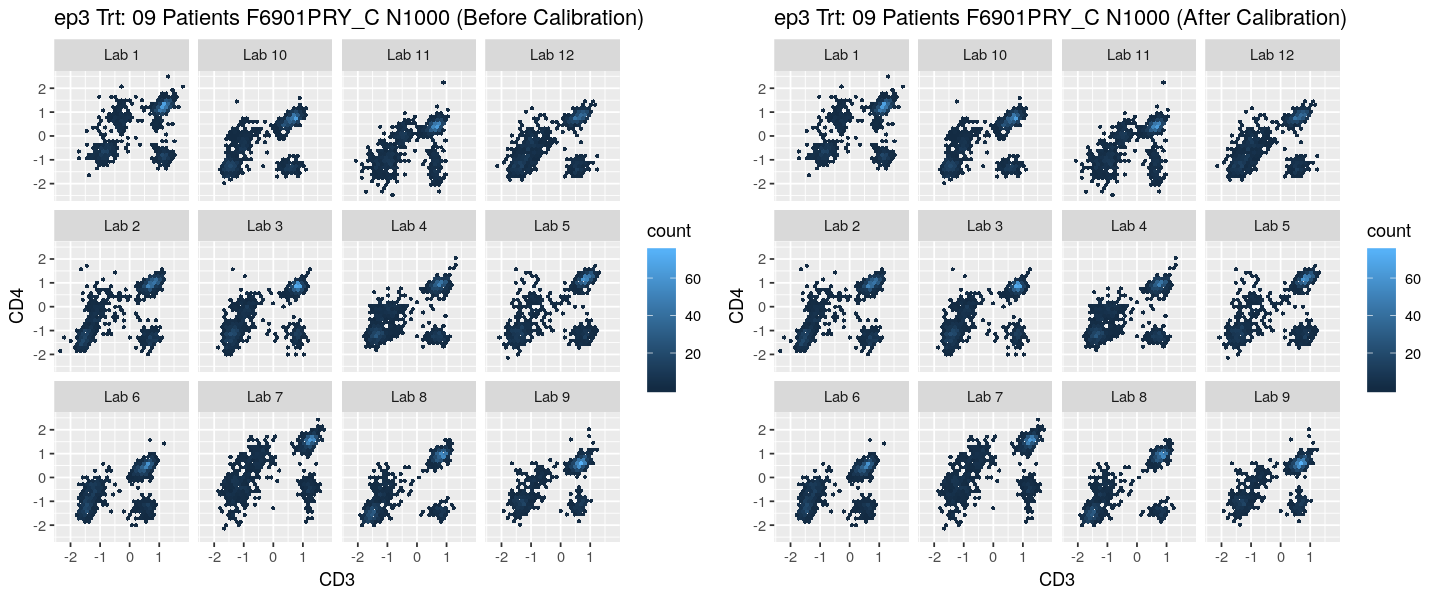

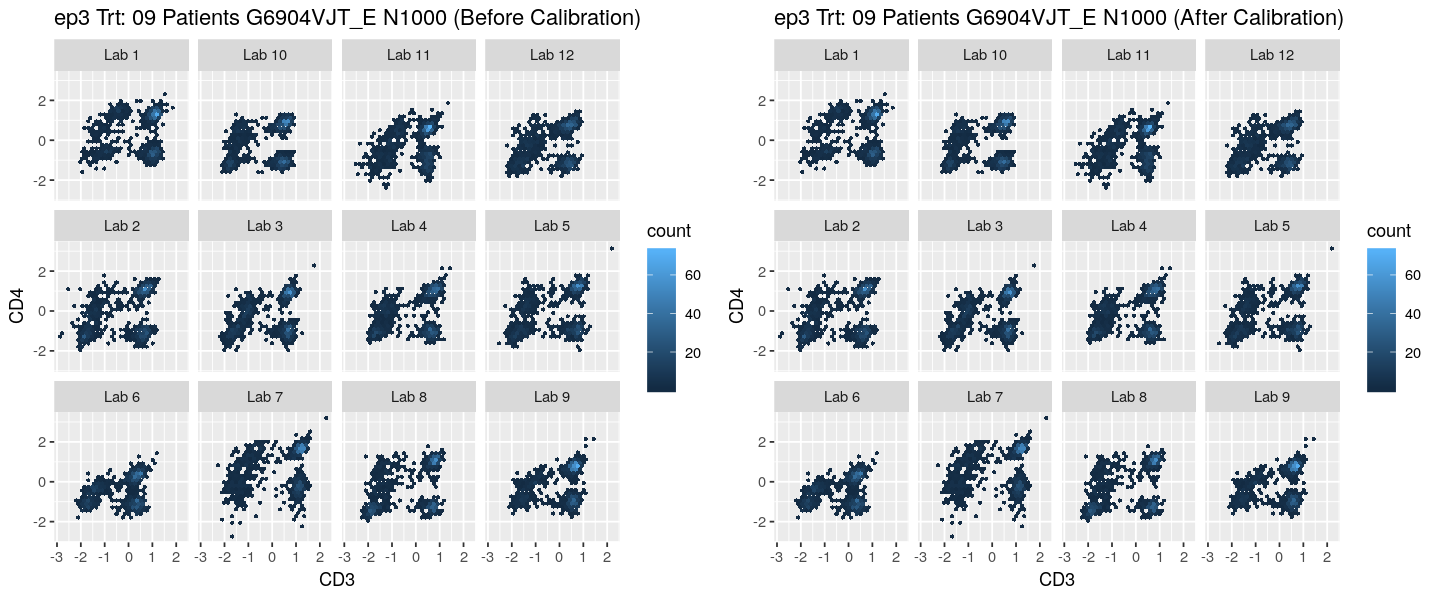

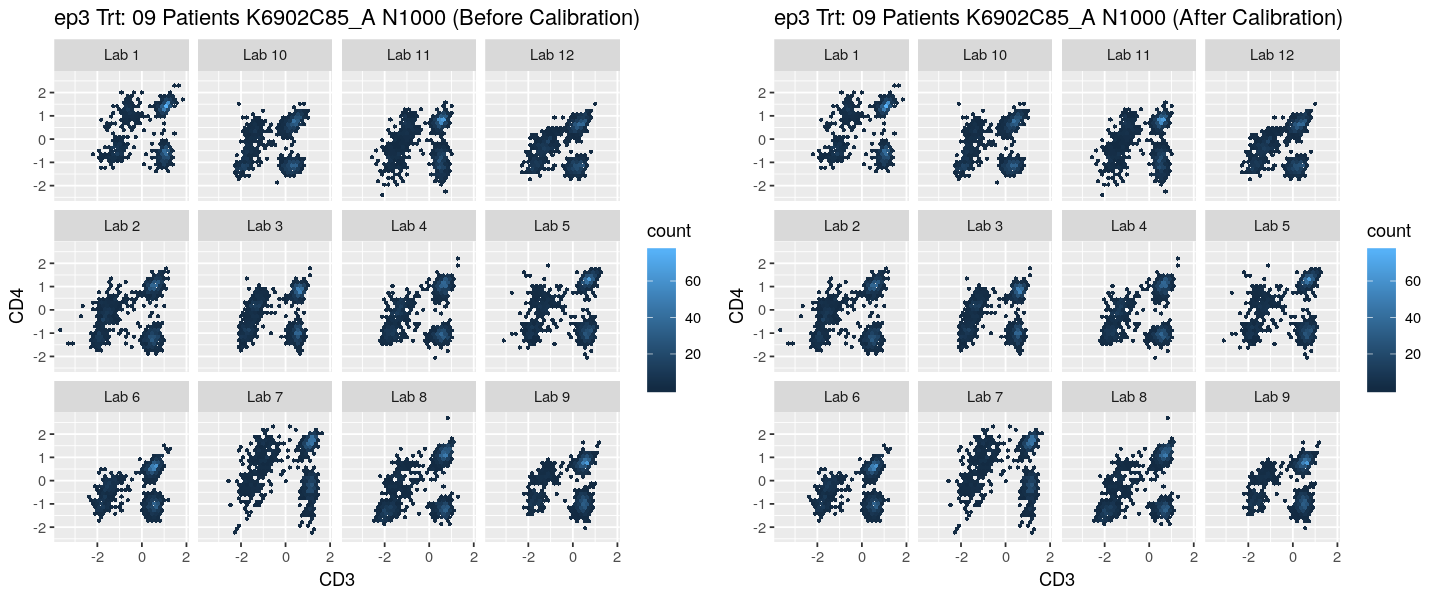

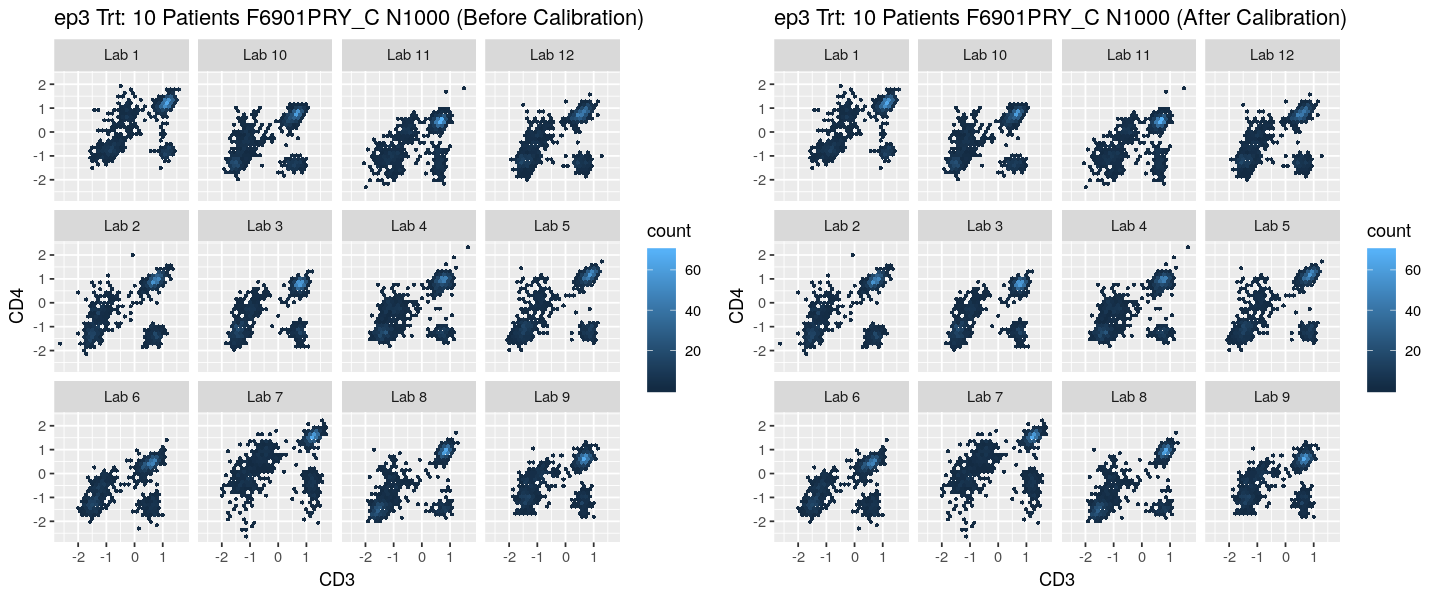

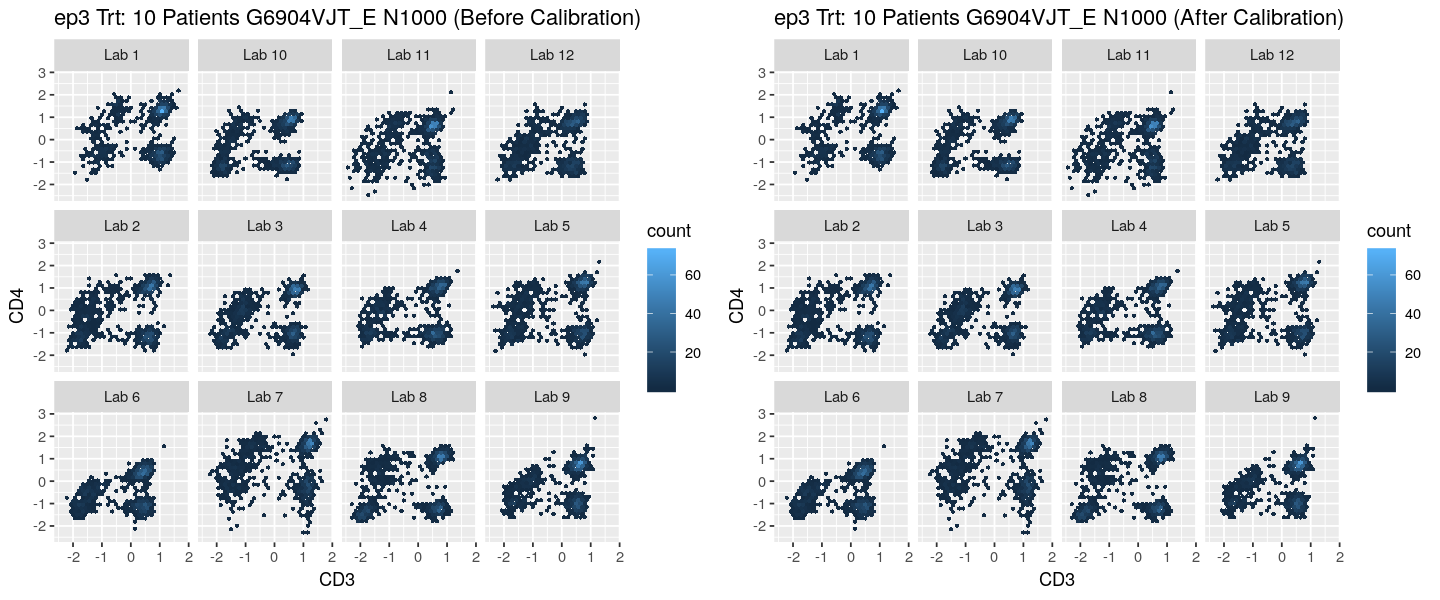

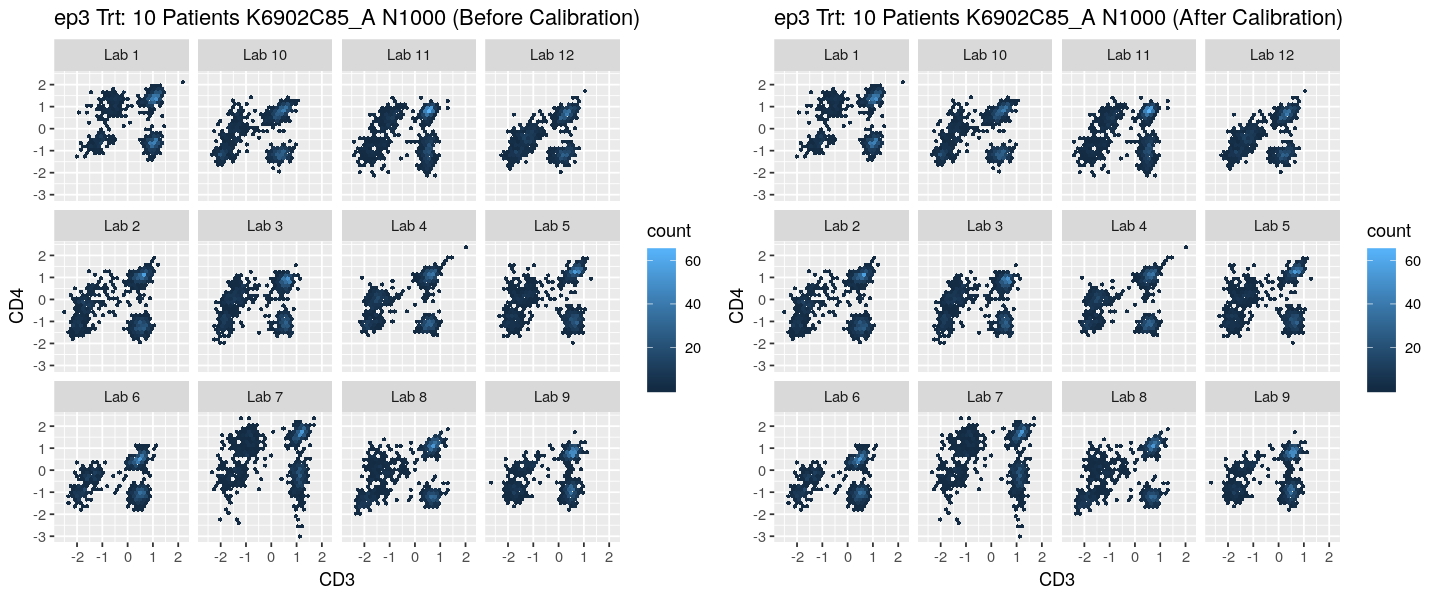

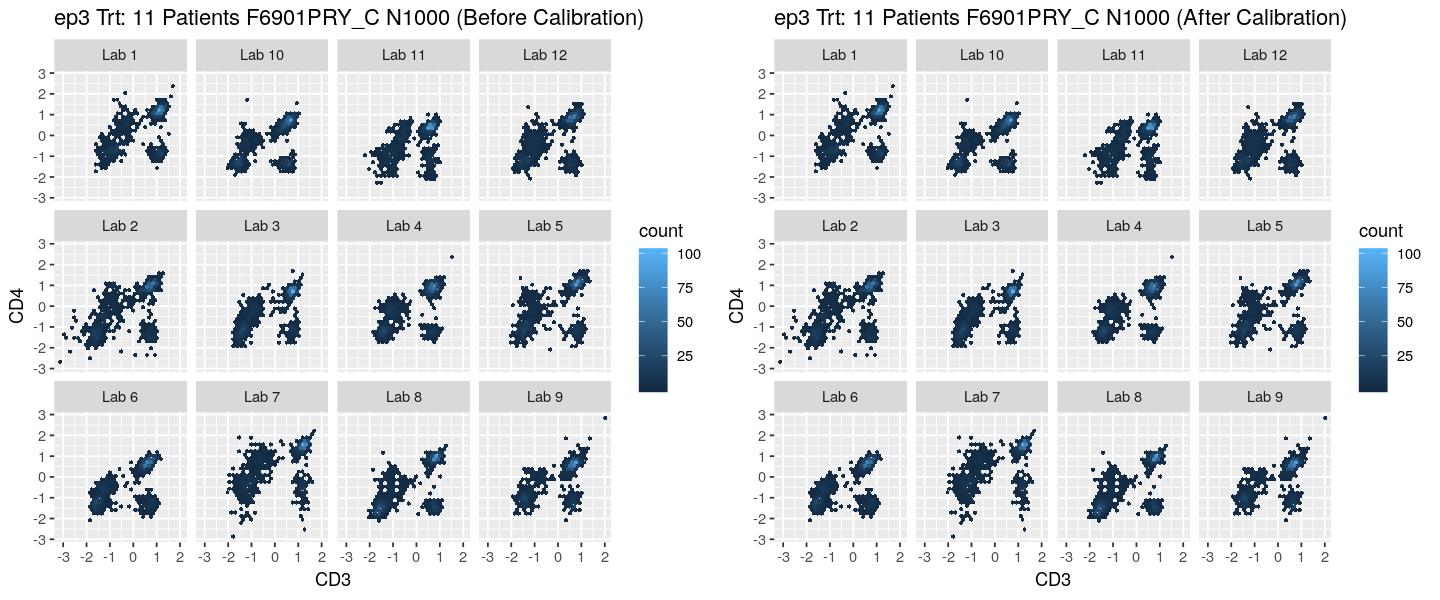

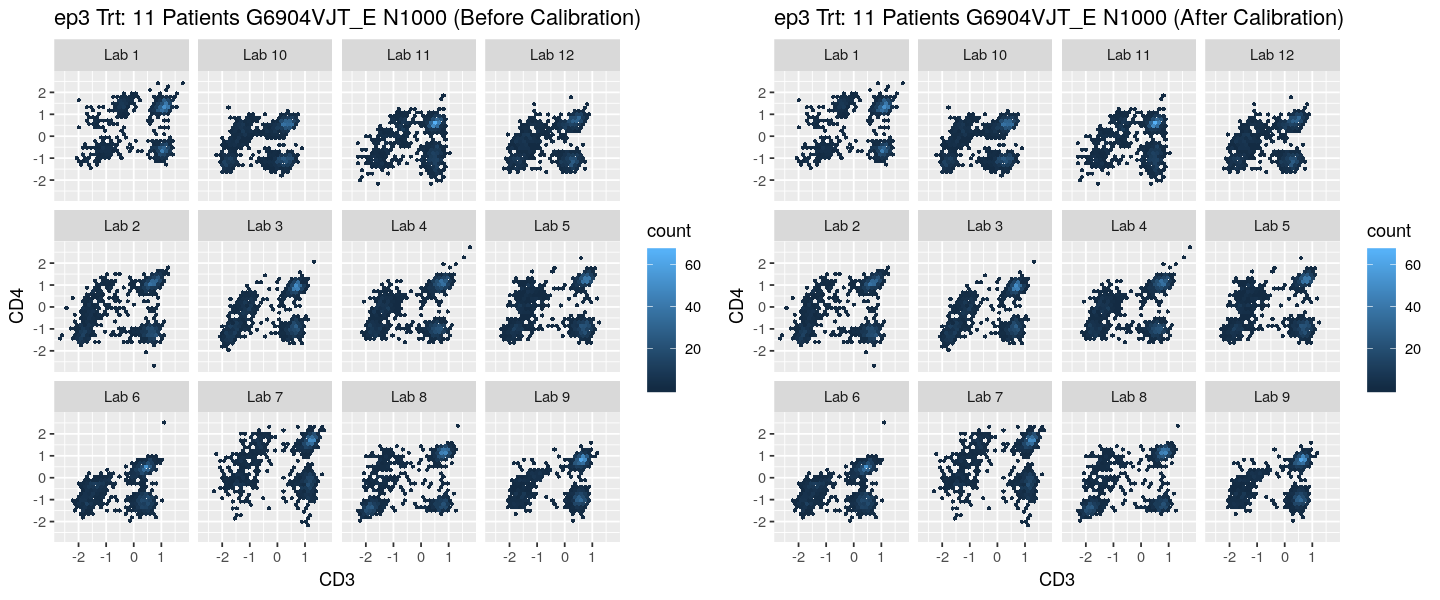

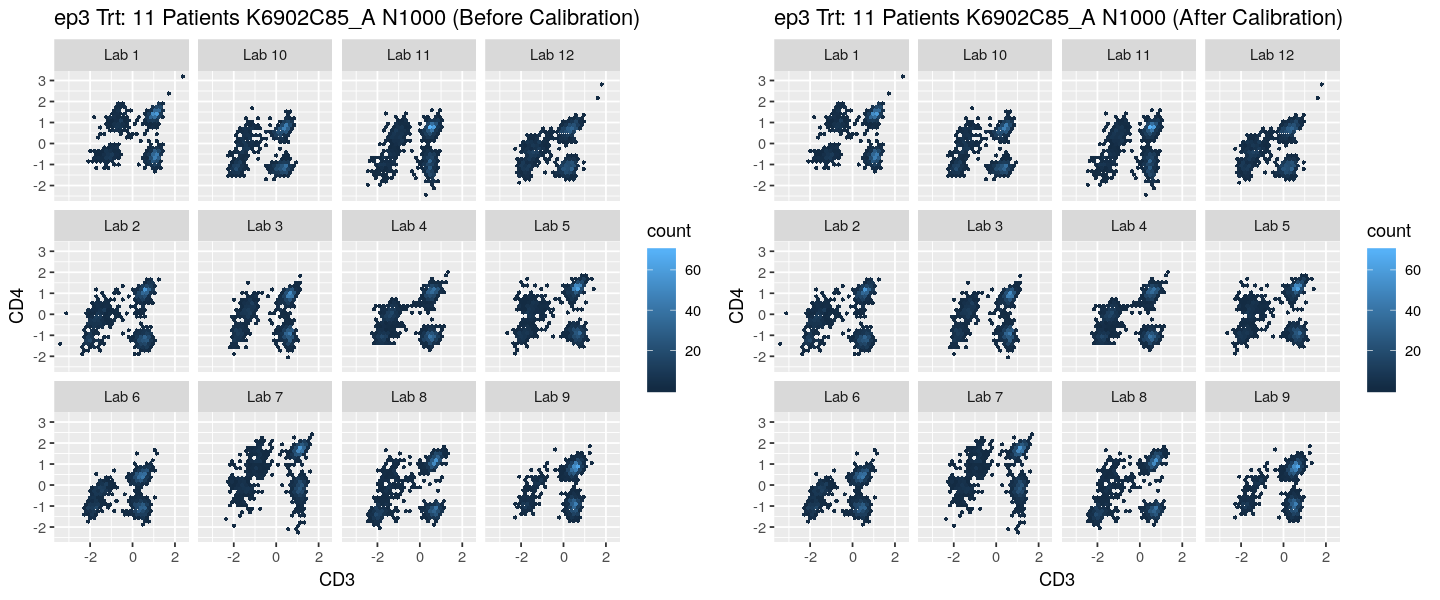

In [7]:
options(repr.plot.height = 5, repr.plot.width = 12)

for (fname in names(res_process)){
    ### retreive results
    tmp = res_process[[fname]]
    resRelab      = tmp$resRelab
    resCalibrated = tmp$resCalibrated
    chainSummary  = tmp$chainSummary

    ### original data and calibrated data
    C     = resRelab$data$C
    Y     = resRelab$data$Y
    Y_cal = resCalibrated$Y_cal

    ### arrange data
    df   = data.frame(Y)
    df$C = paste("Lab", as.vector(C))
    
    df_cal   = data.frame(Y_cal)
    df_cal$C = paste("Lab", as.vector(C))
    
    ### label and cluster
    J = length(unique(C))
    kIdx = unique(chainSummary$t) 
    
    ### set title
    title = unlist(str_split(fname, "_|\\."))
    title = paste(title[2], "Trt:", title[3], "Patients", paste(title[4], title[5], sep = "_"), title[7])
    #print(title)
    
    gp1 = ggplot(df, aes(x = CD3, y = CD4, group = C)) + 
         geom_hex() + facet_wrap(~C) +
         labs(title = paste(title, "(Before Calibration)"))

    gp2 = ggplot(df_cal, aes(x = CD3, y = CD4, group = C)) + 
         geom_hex() + facet_wrap(~C) +
         labs(title = paste(title, "(After Calibration)"))

    grid.arrange(gp1, gp2, ncol = 2)
}